## The objective is to perform clustering (using K-Means and Hierarchical Clustering) on a dataset and compare the results before and after applying PCA to reduce dimensionality

In [5]:
import pandas as pd
dataset = pd.read_csv('wine.csv')  # Replace with actual dataset path
dataset.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
dataset.shape

(178, 14)

In [9]:
df = dataset.isnull().sum()
df


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## Data preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)


## Clustering on original data

- k-means clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

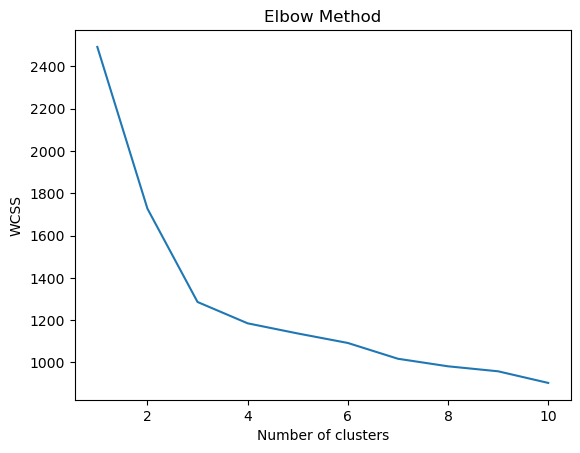

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
optimal_clusters = 3  # Replace with the number determined from the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


we take optimal cluster =3 bcz we get it from elbow method

- Hierarchical clustering

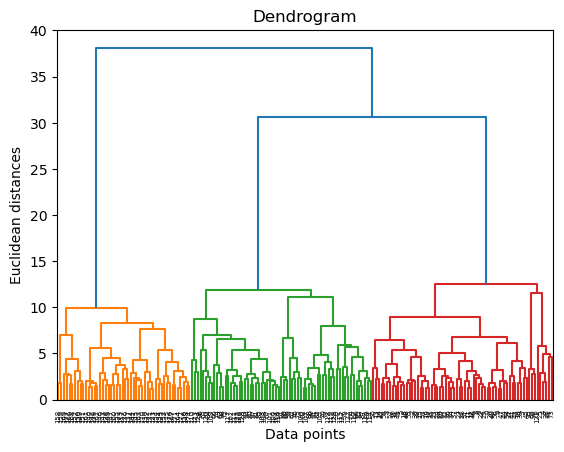

In [20]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()


In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_data)


## PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data) 


In [25]:
# Example of applying KMeans on PCA data
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

# Example of applying Hierarchical Clustering on PCA data
hc_pca = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hc_pca_labels = hc_pca.fit_predict(pca_data)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


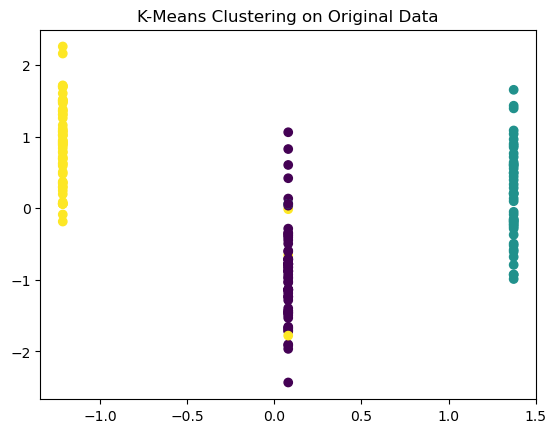

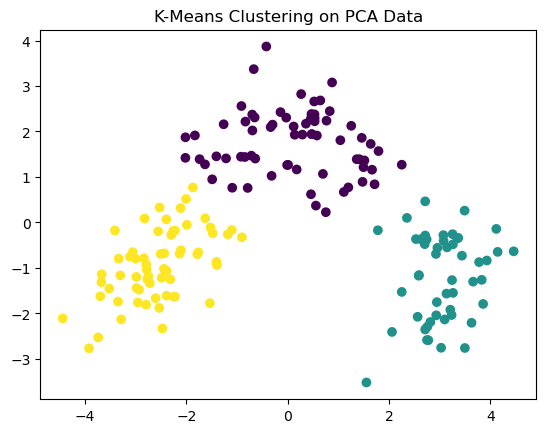

In [27]:
# Scatter plot for original clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering on Original Data')
plt.show()

# Scatter plot for PCA-based clustering
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca_labels)
plt.title('K-Means Clustering on PCA Data')
plt.show()


### clusters formed are not well-defined, and points may appear scattered due to the high-dimensional nature of the original dataset

 ### Clusters are likely to be more distinct and separated compared to the original feature space. This is because PCA reduces the dimensionality of the data, capturing the most important variance, which can lead to clearer separation of clusters.

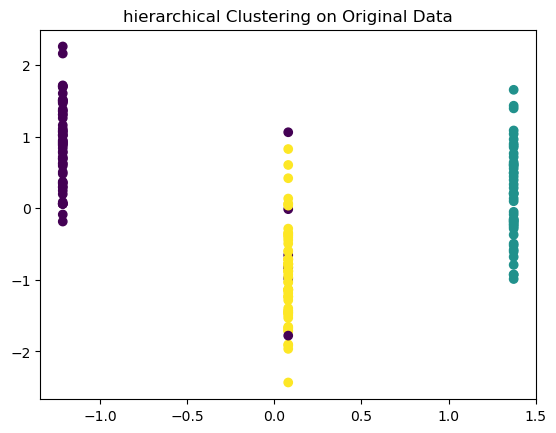

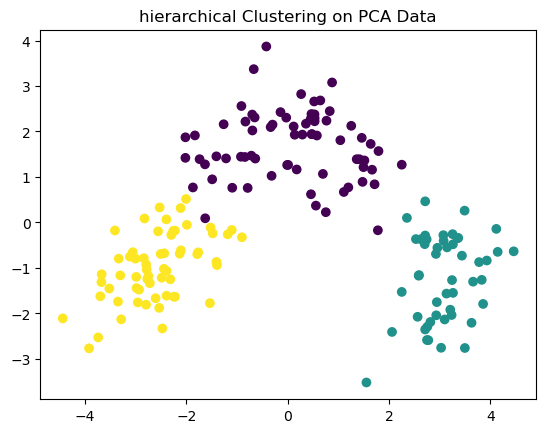

In [35]:
# Scatter plot for original clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hc_labels)
plt.title('hierarchical Clustering on Original Data')
plt.show()

# Scatter plot for PCA-based clustering
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hc_pca_labels)
plt.title('hierarchical Clustering on PCA Data')
plt.show()
